<a href="https://colab.research.google.com/github/raklugrin01/KaggleBasicComp/blob/main/DisasterTweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#libraries for NLP
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#lets import our dataset using pandas download from https://www.kaggle.com/c/nlp-getting-started/data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/nlp-getting-started/train.csv')

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


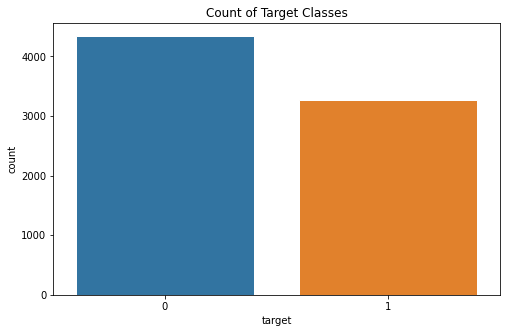

In [5]:
#from above we can see that keyword and location columns of our data are missing values.
#we visualize the counts of our target column
plt.figure(figsize=(8,5))
plt.title("Count of Target Classes")
sns.set_style("darkgrid")
sns.countplot(x=data["target"])
plt.show()

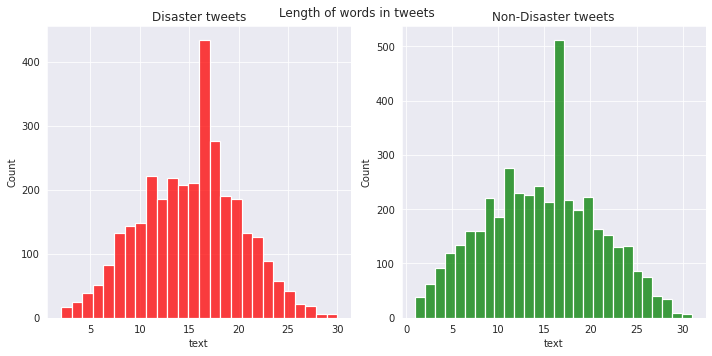

In [6]:
#we see that our data is quite balanced 
#analyzing length of words in a tweet according to its target value
word_len_dis = data[data['target']==1]['text'].str.split().map(lambda x : len(x))
word_len_non_dis = data[data['target']==0]['text'].str.split().map(lambda x : len(x))
fig, axes = plt.subplots(1, 2, figsize=(10,5))
plt.suptitle('Length of words in tweets')
axes[0].set_title('Disaster tweets')
axes[1].set_title('Non-Disaster tweets')
sns.histplot(word_len_dis, ax=axes[0],color='red', linewidth=1.2)
sns.histplot(word_len_non_dis, ax=axes[1],color='green', linewidth=1.2)
plt.tight_layout()
plt.show()

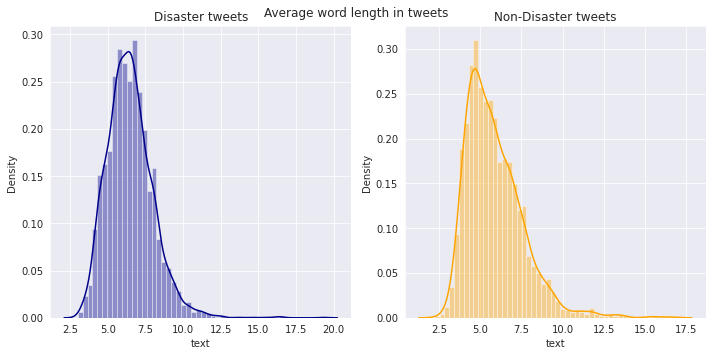

In [7]:
#from above we can see that number of words in the tweets ranges from 2 to 30
#now we will check average word length for both type of tweets
def avgwordlen(strlist):
  sum=[]
  for i in strlist:
    sum.append(len(i))
  return sum
avgword_len_dis = data[data['target']==1]['text'].str.split().apply(avgwordlen).map(lambda x: np.mean(x))
avgword_len_non_dis = data[data['target']==0]['text'].str.split().apply(avgwordlen).map(lambda x: np.mean(x))
fig, axes = plt.subplots(1, 2, figsize=(10,5))
plt.suptitle('Average word length in tweets')
axes[0].set_title('Disaster tweets')
axes[1].set_title('Non-Disaster tweets')
sns.distplot(avgword_len_dis, ax=axes[0],color='darkblue')
sns.distplot(avgword_len_non_dis, ax=axes[1],color='orange')
plt.tight_layout()
plt.show()

In [8]:
#it can be observed that the average word count for disaster tweets are found to be in the range(5-7.5)
# while for non-disaster tweets are in the range of (4-6).
# Creating sample corpus for further analysis.
def create_corpus(target):
  corpus = []
  for i in data[data['target']==target]['text'].str.split():
    for x in i:
      corpus.append(x)
  return corpus

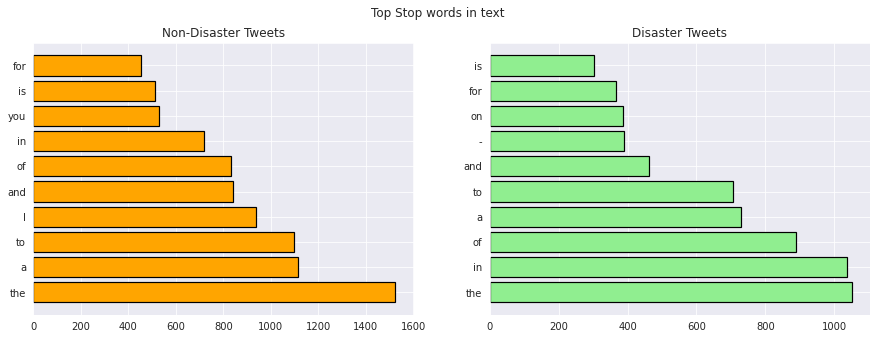

In [9]:
# Analysing top stop words in text.
from collections import defaultdict

def analyze_stopwords(data,func,targetlist):
  values_list = []

  for label in range(0,len(targetlist)):
    corpus = func(targetlist[label])
    dic = defaultdict(int)
    
    for word in corpus:
      dic[word] += 1
    
    top = sorted(dic.items(),key = lambda x: x[1],reverse=True)[:10]
    x_items,y_values = zip(*top)
    values_list.append(x_items)
    values_list.append(y_values)
  
  _ ,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
  
  ax1.barh(values_list[0],values_list[1],color="orange",edgecolor='black', linewidth=1.2)
  ax1.set_title("Non-Disaster Tweets")
    
  ax2.barh(values_list[2],values_list[3],color="lightgreen",edgecolor='black', linewidth=1.2)
  ax2.set_title("Disaster Tweets")
            
  plt.suptitle("Top Stop words in text")
  plt.show()

#analyzing stopwords for 0 and 1 target labels
analyze_stopwords(data,create_corpus,[0,1])

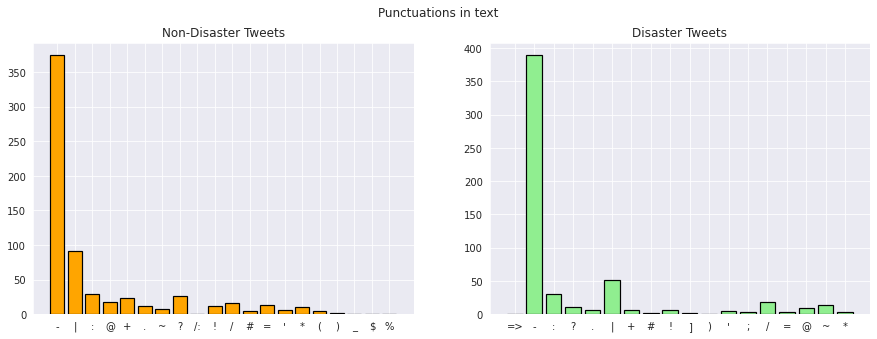

In [10]:
#The above Bar Charts displays the top 10 stop words in tweets where the occurs the most in both groups
# Anaysing Punctuations
from string import punctuation
def analyze_punctuations(data,func,targetlist):
  values_list = []
  
  for label in range(0,len(targetlist)):
    corpus = func(targetlist[label])
    dic = defaultdict(int)
    
    for word in corpus:
      if word in punctuation:
        dic[word] += 1 
    x_items, y_values = zip(*dic.items())
    values_list.append(x_items)
    values_list.append(y_values)
  _ , (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

  ax1.bar(values_list[0],values_list[1],color="orange",edgecolor='black', linewidth=1.2)
  ax1.set_title("Non-Disaster Tweets")
    
  ax2.bar(values_list[2],values_list[3],color="lightgreen",edgecolor='black', linewidth=1.2)
  ax2.set_title("Disaster Tweets")
            
  plt.suptitle("Punctuations in text")
  plt.show()

#analyzing stopwords for 0 and 1 target labels
analyze_punctuations(data,create_corpus,[0,1])

In [11]:
#  it is observed that the most occuring punctuations in both disaster/non-disaster tweets is '-'(350+) and '|'
#  while the least occuring for non-disaster are '%','/:','$','_' and for disaster tweets is '=>', ')'.
# Now let's clean the data
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_data(data):

    review =re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',data) #removal of url
    review =re.sub(r'<.*?>',' ',review) #removal of html tags
    
    review = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',review)
    
    review = re.sub('[^a-zA-Z]',' ',review) # filtering out miscellaneous text.
    review = re.sub(r"\([^()]*\)", "", review)
    review = review.lower() # Lowering all the words in text
    review = review.split()
    review = [stemmer.stem(words) for words in review if words not in stopwords.words('english')] #Stemming
    review = [i for i in review if len(i)>2] # Removal of words with length<2
    review = ' '.join(review)
    return review

data["Cleaned_text"] = data["text"].apply(preprocess_data)

In [12]:
data.head()

,id,keyword,location,text,target,Cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near rong sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,peopl receiv wildfir evacu order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...


In [13]:
def wordcloud(data,title):
    words = ' '.join(data['Cleaned_text'].astype('str').tolist())
    stopwords = set(STOPWORDS)
    wc = WordCloud(stopwords = stopwords,width= 512, height = 512).generate(words)
    plt.figure(figsize=(10,8),frameon=True)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title,fontsize=20)
    plt.show()
    

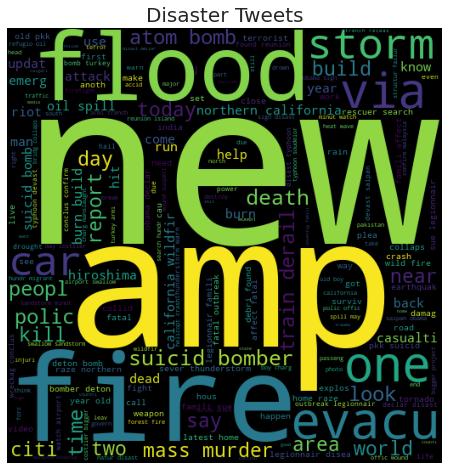

In [14]:
data_disaster = data[data['target'] == 1]
data_non_disaster = data[data['target'] == 0]

wordcloud(data_disaster,"Disaster Tweets")

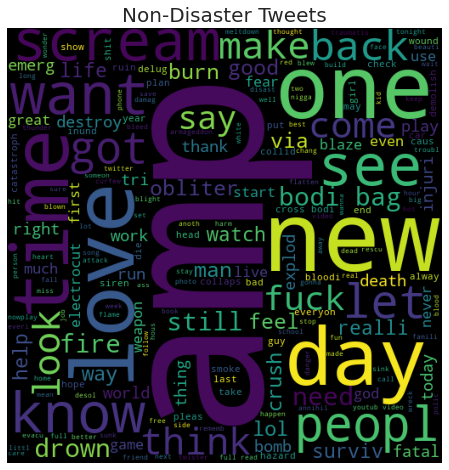

In [15]:
#we can see that most common words in disaster tweets are fire,storm,flood , police, evac, etc.
#now let's have a look on Non-Disaster tweets
wordcloud(data_non_disaster,"Non-Disaster Tweets")

In [16]:
#love,new,time etc are the most common words in wordcloud of Non-disaster tweets
#it appears that our cleaned text still contains some unnecessary words (such as: like, amp, get, would etc.) that aren't relevant and can confuse our model,
# resulting in false prediction.
# Now, we will further remove some confusing words from text based on above charts.

common_words = ['via','like','build','get','would','one','two','feel','lol','fuck','take','way','may','first','latest'
                'want','make','back','see','know','let','look','come','got','still','say','think','great','pleas','amp']

def text_cleaning(data):
    return ' '.join(i for i in data.split() if i not in common_words)

data["Cleaned_text"] = data["Cleaned_text"].apply(text_cleaning)

In [17]:
# Now we will convert our cleaned text in numerical form as our model will only take numerical inputs
# BOW
def top_ngrams(data,n,grams):
    count_vec = CountVectorizer(ngram_range=(grams,grams)).fit(data)
    bow = count_vec.transform(data)
    add_words = bow.sum(axis=0)
    word_freq = [(word, add_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse=True) 
    return word_freq[:n]
    

In [18]:
#analysing top 10 N-grams
common_uni = top_ngrams(data["Cleaned_text"],10,1)
common_bi = top_ngrams(data["Cleaned_text"],10,2)
common_tri = top_ngrams(data["Cleaned_text"],10,3)
common_uni_df = pd.DataFrame(common_uni,columns=['word','freq'])
common_bi_df = pd.DataFrame(common_bi,columns=['word','freq'])
common_tri_df = pd.DataFrame(common_tri,columns=['word','freq'])

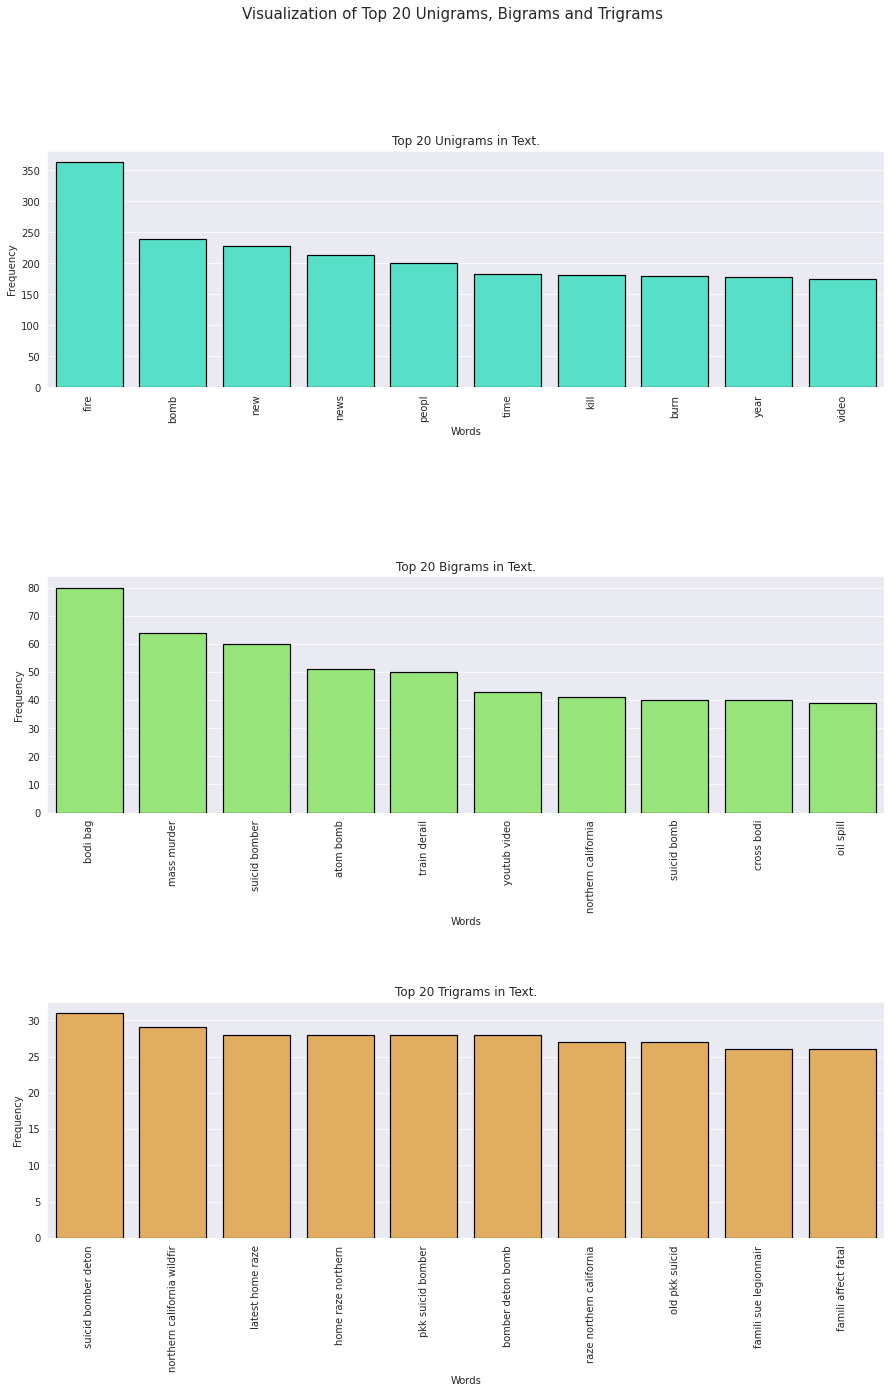

In [19]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,20))
sns.barplot(common_uni_df["word"],common_uni_df["freq"],ax=ax1,color="#42f5d7",edgecolor='black', linewidth=1.2)
ax1.set_title("Top 20 Unigrams in Text.")
ax1.set_xlabel("Words")
ax1.set_ylabel("Frequency")
ax1.set_xticklabels(rotation=90,labels=common_uni_df["word"],fontsize=10)    

sns.barplot(common_bi_df["word"],common_bi_df["freq"],ax=ax2,color="#8ef569",edgecolor='black', linewidth=1.2)
ax2.set_title("Top 20 Bigrams in Text.")
ax2.set_xlabel("Words")
ax2.set_ylabel("Frequency")
ax2.set_xticklabels(rotation=90,labels=common_bi_df["word"],fontsize=10)    

sns.barplot(common_tri_df["word"],common_tri_df["freq"],ax=ax3,color="#f5b14c",edgecolor='black', linewidth=1.2)
ax3.set_title("Top 20 Trigrams in Text.")
ax3.set_xlabel("Words")
ax3.set_ylabel("Frequency")
ax3.set_xticklabels(rotation=90,labels=common_tri_df["word"],fontsize=10)    
 
plt.suptitle("Visualization of Top 20 Unigrams, Bigrams and Trigrams",fontsize="15")
plt.subplots_adjust(hspace = 0.8)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split,GridSearchCV
y = np.array(data['target'])
X = data['Cleaned_text']
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2 ,random_state=42, stratify = y)

In [21]:
#From the chart, it is observed that the most occuring unigram in text is: fire (350+), for bigram, it is : bodi bag (80+)
#and for trigram, it is suicide bomber deton(30+) while the least is video (150+) for unigram, it is oil spill(<40) 
#for bigram and it is family affect fatal (>25) for trigrams.
# Creating functions for using BOW,TF-IDF both with with 1 ngram 

def encoding_data(train_data,valid_data,bow=False,tf_idf=False):

    if bow==True: 
        cv = CountVectorizer(ngram_range=(1, 1))
        cv_df_train = cv.fit_transform(train_data).toarray()
        train_df = pd.DataFrame(cv_df_train,columns=cv.get_feature_names())
        cv_df_valid = cv.transform(valid_data).toarray()
        valid_df = pd.DataFrame(cv_df_valid,columns=cv.get_feature_names())
        
    elif tf_idf==True:
        
        tfidf = TfidfVectorizer(ngram_range=(1, 1), use_idf=1,smooth_idf=1,sublinear_tf=1)    
        tf_df_train = tfidf.fit_transform(train_data).toarray()
        train_df = pd.DataFrame(tf_df_train,columns=tfidf.get_feature_names())
        tf_df_valid = tfidf.transform(valid_data).toarray()
        valid_df = pd.DataFrame(tf_df_valid,columns=tfidf.get_feature_names())
        
    return train_df,valid_df

In [22]:
X_train_final,X_valid_final = encoding_data(X_train,X_valid,bow=True)

In [23]:
X_train_final.shape,y_train.shape,X_valid_final.shape,y_valid.shape

((6090, 11114), (6090,), (1523, 11114), (1523,))

In [24]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.naive_bayes import MultinomialNB
modelNB = MultinomialNB()
modelNB.fit(X_train_final,y_train)
predNB = modelNB.predict(X_valid_final)
cr    = classification_report(y_valid,predNB)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       869
           1       0.80      0.77      0.78       654

    accuracy                           0.82      1523
   macro avg       0.81      0.81      0.81      1523
weighted avg       0.82      0.82      0.82      1523



In [25]:
from sklearn.pipeline import Pipeline
classifier = Pipeline([('vect', CountVectorizer(lowercase=False)),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
])

# parameter tuning with grid search
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2),(1,3)],
              'vect__max_df': ( 0.7,0.8,0.9,1.0),
              'vect__min_df': (1,2),    
              'clf__alpha': ( 0.022,0.025, 0.028),
}
gs_clf = GridSearchCV(classifier, parameters,n_jobs=-1, verbose=1,cv=5)
gs_clf.fit(X_train, y_train)
best_parameters = gs_clf.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

# Predicting the Test set results
y_pred = gs_clf.predict(X_valid)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.4s


	clf__alpha: 0.028
	vect__max_df: 0.7
	vect__min_df: 2
	vect__ngram_range: (1, 2)


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   45.8s finished


In [26]:
cr2    = classification_report(y_valid,y_pred)
print(cr2)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       869
           1       0.85      0.71      0.77       654

    accuracy                           0.82      1523
   macro avg       0.83      0.81      0.81      1523
weighted avg       0.82      0.82      0.82      1523



In [27]:
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/nlp-getting-started/test.csv')
test_data["Cleaned_text"] = test_data["text"].apply(preprocess_data)
test_data["Cleaned_text"] = test_data["Cleaned_text"].apply(text_cleaning)

In [28]:
y_pred_test = gs_clf.predict(test_data['Cleaned_text'])
predictions_test = pd.DataFrame(y_pred_test)
test_id = pd.DataFrame(test_data["id"])
submission = pd.concat([test_id,predictions_test],axis=1)
submission.columns = ["id","target"]
submission.to_csv("SubmissionGS.csv",index=False)

In [29]:
def encoding_test(train_data,test_data,bow=False,tf_idf=False):

    if bow==True: 
        cv = CountVectorizer(ngram_range=(1, 1))
        cv_df_train = cv.fit_transform(train_data).toarray()
        cv_df_test = cv.transform(test_data).toarray()
        test_df = pd.DataFrame(cv_df_test,columns=cv.get_feature_names())
        
    elif tf_idf==True:
        
        tfidf = TfidfVectorizer(ngram_range=(1, 1), use_idf=1,smooth_idf=1,sublinear_tf=1)    
        tf_df_train = tfidf.fit_transform(train_data).toarray()
        tf_df_test = tfidf.transform(test_data).toarray()
        test_df = pd.DataFrame(tf_df_test,columns=tfidf.get_feature_names())
        
    return test_df
test_data_final = encoding_test(X_train,test_data["Cleaned_text"],bow=True)

In [30]:
predNB_test = modelNB.predict(test_data_final)

In [31]:
predictions_test = pd.DataFrame(predNB_test)
test_id = pd.DataFrame(test_data["id"])
submission = pd.concat([test_id,predictions_test],axis=1)
submission.columns = ["id","target"]
submission.to_csv("SubmissionNB.csv",index=False)